# Create training curves from garage results

Results were obtained by running
```sh
python cluster_train.py -m ++main_config.env_name=HalfCheetahVelEnv,HopperV2,HalfCheetahV2,Walker2DV2 ++main_config.seed=42,100,148,432,427,94,1039,6432,39,12032
```

The inverted pendulm results were obtained with 
```sh
python cluster_train_inv_pend.py -m ++main_config.env_name=InvertedPendulumV2 ++main_config.num_test_tasks=8 ++main_config.num_train_tasks=8 ++main_config._target_="cluster_train_inv_pend.main" ++main_config.latent_size=2 ++main_config.reward_scale=1 ++main_config.meta_batch_size=8 ++main_config.seed=42,100,148,432,427,94,1039,6432,39,12032
```
and with 
```sh
python cluster_train_inv_pend.py -m ++main_config.env_name=InvertedPendulumV2 ++main_config.num_test_tasks=8 ++main_config.num_train_tasks=8 ++main_config._target_="cluster_train_inv_pend.main" ++main_config.latent_size=2 ++main_config.reward_scale=1.0  ++main_config.meta_batch_size=8 ++main_config.seed=321,435,645,543,0987,364,1,83,5,111
```

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt	
import gym
import d4rl  # need to get envs into gym.make()

In [121]:
# DATA = {
#     "HalfCheetah": {
#         "alg": {
#             "PEARL": "csv/halfcheetah-pearl-1000.csv",
#             "TrMRL": "csv/halfcheetah-trmrl-ep-length=1000-new.csv",  
#         },
#         "normalise_env": gym.make("halfcheetah-medium-v2")
#     },
#     "Hopper": {
#         "alg": {
#             "PEARL": "csv/hopper-pearl-1000.csv",
#             "TrMRL": "csv/hopper-trmrl-ep-length=1000-new.csv", 
#         },
#         "normalise_env": gym.make("hopper-medium-v2"),  
#     },
#     "walker": {
#         "alg": {
#             "PEARL": "csv/walker-pearl-1000.csv",
#             "TrMRL": "csv/walker-trmrl-ep-length=1000-new.csv", 
#         },
#         "normalise_env": gym.make("walker2d-medium-v2"), 
#     }
# }
DATA = {
    "InvertedPendulum": {
        "alg": {
            # rsync triton:/scratch/work/scannea1/python-projects/garage-pearl/src/garage/examples/torch/output/cluster_train_inv_pend/2023-12-11_15-18-51/9/data/local/experiment/main/progress.csv ./inv-pend-pearl-seed-10.csv
            # "PEARL": "inv-pend-pearl-seed-1.csv",
            # "PEARL": "inv-pend-pearl-seed-2.csv", # FAILED
            # "PEARL": "inv-pend-pearl-seed-3.csv",
            # "PEARL": "inv-pend-pearl-seed-4.csv",
            # "PEARL": "inv-pend-pearl-seed-5.csv", # FAILED
            # "PEARL": "inv-pend-pearl-seed-6.csv",
            # "PEARL": "inv-pend-pearl-seed-7.csv", # FAILED
            # "PEARL": "inv-pend-pearl-seed-8.csv",
            # "PEARL": "inv-pend-pearl-seed-9.csv", # FAILED
            # "PEARL": "inv-pend-pearl-seed-10.csv", # FAILED
            # rsync triton:/scratch/work/scannea1/python-projects/garage-pearl/src/garage/examples/torch/output/cluster_train_inv_pend/2023-12-11_16-08-58/9/data/local/experiment/main/progress.csv ./inv-pend-pearl-seed-10-second-try.csv
            # "PEARL": "inv-pend-pearl-seed-1-second-try.csv",
            # "PEARL": "inv-pend-pearl-seed-2-second-try.csv",
            # "PEARL": "inv-pend-pearl-seed-3-second-try.csv",
            # "PEARL": "inv-pend-pearl-seed-4-second-try.csv",
            # "PEARL": "inv-pend-pearl-seed-5-second-try.csv",
            # "PEARL": "inv-pend-pearl-seed-6-second-try.csv",
            # "PEARL": "inv-pend-pearl-seed-7-second-try.csv",
            # "PEARL": "inv-pend-pearl-seed-8-second-try.csv",
            # "PEARL": "inv-pend-pearl-seed-9-second-try.csv",
            "PEARL": "inv-pend-pearl-seed-10-second-try.csv",
        },
        "normalise_env": gym.make("hopper-medium-v2")
    }
    # "HalfCheetah": {
    #     "alg": {
    #         "PEARL": "csv-old/halfcheetah-pearl-1000.csv",
    #         "TrMRL": "csv-old/halfcheetah-trmrl-ep-length=1000-new.csv",  
    #         "PEARL new": [
    #             "csv/halfcheetah-pearl-seed-1.csv",
    #             "csv/halfcheetah-pearl-seed-2.csv",
    #             "csv/halfcheetah-pearl-seed-3.csv",
    #             "csv/halfcheetah-pearl-seed-4.csv",
    #             "csv/halfcheetah-pearl-seed-5.csv",
    #             "csv/halfcheetah-pearl-seed-6.csv",
    #             "csv/halfcheetah-pearl-seed-7.csv",
    #             "csv/halfcheetah-pearl-seed-8.csv",
    #             "csv/halfcheetah-pearl-seed-9.csv",
    #             "csv/halfcheetah-pearl-seed-10.csv",
    #         ]
    #     },
    #     "normalise_env": gym.make("halfcheetah-medium-v2")
    # },
    # "Hopper": {
    #     "alg": {
    #         "PEARL": "csv-old/hopper-pearl-1000.csv",
    #         "TrMRL": "csv-old/hopper-trmrl-ep-length=1000-new.csv", 
    #         "PEARL new": [
    #             "csv/hopper-pearl-seed-1.csv",
    #             "csv/hopper-pearl-seed-2.csv",
    #             "csv/hopper-pearl-seed-3.csv",
    #             "csv/hopper-pearl-seed-4.csv",
    #             "csv/hopper-pearl-seed-5.csv",
    #             "csv/hopper-pearl-seed-6.csv",
    #             "csv/hopper-pearl-seed-7.csv",
    #             "csv/hopper-pearl-seed-8.csv",
    #             "csv/hopper-pearl-seed-9.csv",
    #             "csv/hopper-pearl-seed-10.csv",
    #         ]
    #     },
    #     "normalise_env": gym.make("hopper-medium-v2"),  
    # },
    # "walker": {
    #     "alg": {
    #         "PEARL": "csv-old/walker-pearl-1000.csv",
    #         "TrMRL": "csv-old/walker-trmrl-ep-length=1000-new.csv", 
    #         "PEARL new": [
    #             "csv/walker-pearl-seed-1.csv",
    #             "csv/walker-pearl-seed-2.csv",
    #             "csv/walker-pearl-seed-3.csv",
    #             "csv/walker-pearl-seed-4.csv",
    #             "csv/walker-pearl-seed-5.csv",
    #             "csv/walker-pearl-seed-6.csv",
    #             "csv/walker-pearl-seed-7.csv",
    #             "csv/walker-pearl-seed-8.csv",
    #             "csv/walker-pearl-seed-9.csv",
    #             "csv/walker-pearl-seed-10.csv",
    #         ]
    #     },
    #     "normalise_env": gym.make("walker2d-medium-v2"), 
    # }
}

In [122]:
def plot_training_curve(fig, axs, df, env_name: str , alg_name: str, normalise_env: str ="cheetah-medium-v2"):
    iteration = df["TotalEnvSteps"].dropna()
    if alg_name == "PEARL":
        avg_return = df["MetaTest/Average/AverageReturn"].dropna()
    elif alg_name == "TrMRL":
        # for col in df.columns:
        #     print(col)
        avg_return = df["Average/AverageReturn"].dropna()
        # avg_return = df["Evaluation/AverageReturn"].dropna()

    axs[0].plot(iteration.loc[avg_return.index], avg_return, label=alg_name)
    axs[1].plot(iteration.loc[avg_return.index], normalise_env.get_normalized_score(avg_return)*100, label=alg_name)
    axs[0].set_ylabel("Avg return")
    axs[1].set_ylabel("Avg return (normalised medium)")
    for ax in axs:
        ax.set_xlabel("Env steps")
        ax.set_title(env_name)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(0,5))
    axs[0].legend()

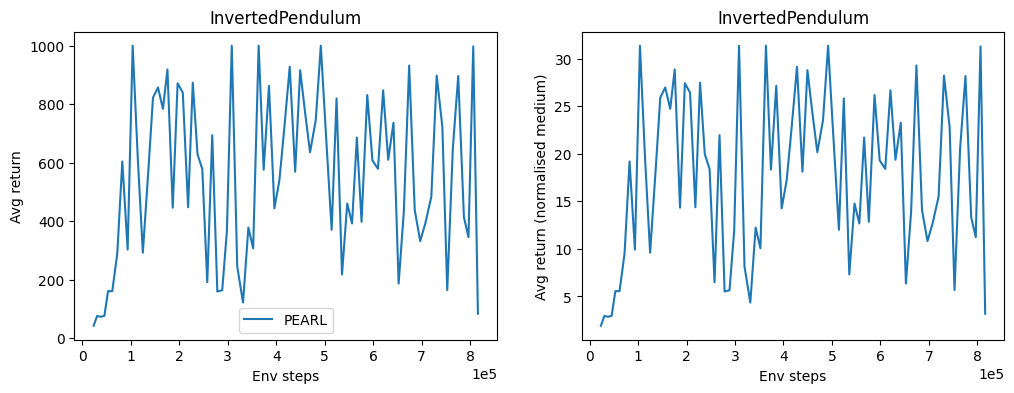

In [123]:
for env_name in DATA.keys():
    fig, axs = plt.subplots(1,2, figsize=(12, 4))
    for alg_name in DATA[env_name]["alg"].keys():
        if isinstance(DATA[env_name]["alg"][alg_name], list):
            avg_returns = []
            for seed in DATA[env_name]["alg"][alg_name]:
                df = pd.read_csv(seed)
                avg_returns.append(df["MetaTest/Average/AverageReturn"].dropna())
            avg_returns = np.stack(avg_returns, 0)
            print(f"avg_returns {avg_returns.shape}")
        else:   
            df = pd.read_csv(DATA[env_name]["alg"][alg_name])
        plot_training_curve(fig, axs, df, env_name=env_name, alg_name=alg_name, normalise_env=DATA[env_name]["normalise_env"])
        plt.savefig(f"figs/{env_name}.pdf", transparent=True)

In [285]:
# def plot_return(iteration, avg_return_avg, avg_return_eval, avg_return_meta, ylim=None):
#     fig, axs = plt.subplots(1,3, figsize=(16,4))
#     axs[0].plot(iteration.loc[avg_return_avg.index], avg_return_avg)
#     axs[1].plot(iteration.loc[avg_return_eval.index], avg_return_eval)
#     axs[2].plot(iteration.loc[avg_return_meta.index], avg_return_meta)
#     if ylim is not None:
#         for ax in axs:
#             ax.set_ylim(*ylim)
    
#     # return fig
#     # plt.xlim(0,3e4)

In [286]:
# df_hopper = pd.read_csv('hopper-trmrl-results.csv')
# df_hopper = pd.read_csv('hopper-trmrl-ours.csv')
# df_hopper = pd.read_csv('hopper-trmrl-ep-lenght=1000.csv')
# df_cheetah = pd.read_csv('halfcheetah-trmrl-results.csv')
# df_cheetah_original = pd.read_csv('halfcheetah-trmrl-original.csv')
# df_cheetah_original = pd.read_csv('halfcheetahvel-trmrl-ep-length=1000-new.csv')
# df_cheetah_original_pearl = pd.read_csv('halfcheetahvel-pearl.csv')
# # df_cheetah = pd.read_csv('halfcheetah-trmrl-results-eval-20-eps.csv')
# # df_cheetah = pd.read_csv('halfcheetah-trmrl-results-eval-20-eps-new.csv')
# df_cheetah = pd.read_csv('halfcheetah-trmrl-ours.csv')
# df_cheetah = pd.read_csv('halfcheetah-trmrl-ep-lenght=1000.csv')
# df_cheetah = pd.read_csv('halfcheetah-trmrl-ep-length=1000-new.csv')

In [290]:
# # iteration = df["TotalEnvSteps"].dropna().to_numpy()
# iteration = df_cheetah_original["TotalEnvSteps"].dropna()
# # iteration = df["MetaTest_0/Average/Iteration"].dropna().to_numpy()
# iteration

# avg_return_avg = df_cheetah_original["Average/AverageReturn"].dropna()
# avg_return_eval = df_cheetah_original["Evaluation/AverageReturn"].dropna()
# # avg_return = df["MetaTest_0/Average/AverageReturn"].dropna().to_numpy()
# # avg_return_meta = df_cheetah_original["MetaTest_0/Average/AverageReturn"].dropna()
# avg_return_meta = df_cheetah_original["MetaTestAdapt_1/Average/AverageReturn"].dropna()
# avg_return_meta.index
# # avg_return

# plot_return(iteration, avg_return_avg, avg_return_eval, avg_return_meta)

In [291]:
# # iteration = df["TotalEnvSteps"].dropna().to_numpy()
# iteration = df_cheetah_original_pearl["TotalEnvSteps"].dropna()
# # iteration = df["MetaTest_0/Average/Iteration"].dropna().to_numpy()
# iteration

# # avg_return_avg = df_cheetah_original_pearl["Average/AverageReturn"].dropna()
# # avg_return_eval = df_cheetah_original_pearl["Evaluation/AverageReturn"].dropna()
# # avg_return = df["MetaTest_0/Average/AverageReturn"].dropna().to_numpy()
# # avg_return_meta = df_cheetah_original["MetaTest_0/Average/AverageReturn"].dropna()
# avg_return_meta = df_cheetah_original_pearl["MetaTest/Average/AverageReturn"].dropna()
# df_cheetah_original_pearl.columns
# # avg_return

# plot_return(iteration, avg_return_meta, avg_return_meta, avg_return_meta)

In [292]:
# # iteration = df["TotalEnvSteps"].dropna().to_numpy()
# iteration = df_cheetah["TotalEnvSteps"].dropna()
# # iteration = df["MetaTest_0/Average/Iteration"].dropna().to_numpy()
# iteration

# avg_return_avg = df_cheetah["Average/AverageReturn"].dropna()
# avg_return_eval = df_cheetah["Evaluation/AverageReturn"].dropna()
# # avg_return = df["MetaTest_0/Average/AverageReturn"].dropna().to_numpy()
# # avg_return_meta = df_cheetah["MetaTest_0/Average/AverageReturn"].dropna()
# # avg_return_meta = df_cheetah["MetaTestAdapt_1/Average/AverageReturn"].dropna()
# # avg_return_meta.index
# # avg_return
# def normalize_cheetah(score, dataset="halfcheetah-medium-v2"):
#     if dataset == "halfcheetah-medium-v2":
#         ref_max_score = 12135.0
#         ref_min_score = -280.178953
#     else:
#         raise NotImplemetedError
#     return (score - ref_min_score) / (ref_max_score - ref_min_score)

# plot_return(iteration, avg_return_avg, avg_return_eval, normalize_cheetah(avg_return_avg))

In [293]:
# # iteration = df["TotalEnvSteps"].dropna().to_numpy()
# iteration = df_hopper["TotalEnvSteps"].dropna()
# # iteration = df["MetaTest_0/Average/Iteration"].dropna().to_numpy()
# # iteration

# avg_return_avg = df_hopper["Average/AverageReturn"].dropna()
# avg_return_eval = df_hopper["Evaluation/AverageReturn"].dropna()
# # avg_return = df_hopper["MetaTest_0/Average/AverageReturn"].dropna().to_numpy()
# # avg_return_meta = df_hopper["MetaTest_0/Average/AverageReturn"].dropna()
# # avg_return_meta = df_hopper["MetaTestAdapt_1/Average/AverageReturn"].dropna()
# # avg_return_meta.index
# # avg_return 
# def normalize_hopper(score, dataset="hopper-medium-v2"):
#     if dataset == "hopper-medium-v2":
#         ref_max_score = 3234.3
#         ref_min_score = -20.272305
#     else:
#         raise NotImplemetedError
#     return (score - ref_min_score) / (ref_max_score - ref_min_score)

# plot_return(iteration, avg_return_avg, avg_return_eval, normalize_hopper(avg_return_eval))